In [129]:
import nsfg
import pandas as pd
import numpy as np
import thinkstats2
import thinkplot
import scipy

In [84]:
resp = pd.DataFrame(data=nsfg.ReadFemResp()).dropna(subset=['timesmar','jintendn'])

In [85]:
# Part 1
time = resp.timesmar
time.replace(".", np.nan, inplace=True)
timesmar = time.dropna()
timesmar.mean(), timesmar.std()

(1.0865921787709498, 0.32155685959958247)

In [86]:
jint = resp.jintendn
jint.replace(".", np.nan, inplace=True)
jintendn = jint.dropna()
jintendn.mean(), jintendn.std()

(2.712290502793296, 9.859218618451179)

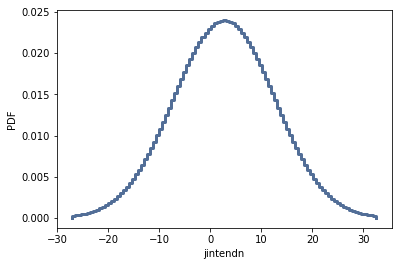

In [87]:
jintpdf = thinkstats2.NormalPdf(jintendn.mean(), jintendn.std())
jintpmf = jintpdf.MakePmf()
thinkplot.Pmf(jintpmf, label='normal')
thinkplot.Config(xlabel='jintendn', ylabel='PDF')

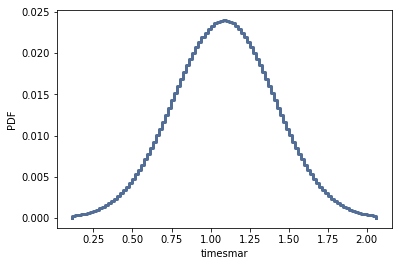

In [88]:
timepdf = thinkstats2.NormalPdf(timesmar.mean(), timesmar.std())
timepmf = timepdf.MakePmf()
thinkplot.Pmf(timepmf, label='normal')
thinkplot.Config(xlabel='timesmar', ylabel='PDF')

### Their means are about the same but their standard deviances vary greatly. timesmar variable varies between 0.7 and 1.3 while jintendn variable varies between -10 and +10

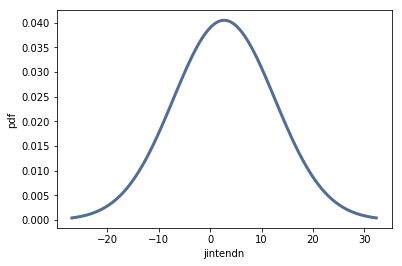

In [89]:
# Part 2
thinkplot.Pdf(jintpdf, label='jentindn')
thinkplot.Config(xlabel='jintendn', ylabel='pdf')

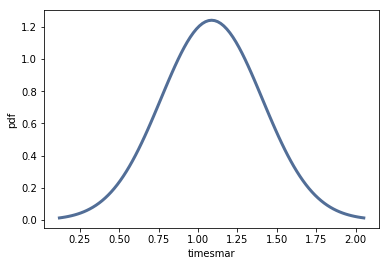

In [90]:
thinkplot.Pdf(timepdf, label='timesmar')
thinkplot.Config(xlabel='timesmar', ylabel='pdf')

In [91]:
def PearsonMedianSkewness(xs):
    median = xs.median()
    mean = xs.mean()
    var = xs.var()
    std = xs.std()
    gp = 3 * (mean - median) / std
    return gp

In [92]:
timesmar.skew(), jintendn.skew(), PearsonMedianSkewness(timesmar), PearsonMedianSkewness(jintendn)

(4.310144095211451, 9.56662578534074, 0.8078712319691618, 0.5210221729708291)

### Both of their skewnesses are positive. This means both variables are skewed to the right

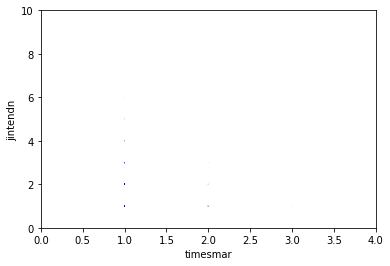

In [97]:
# Part 3
thinkplot.Scatter(resp.timesmar, resp.jintendn, alpha=0.01, s=2)
thinkplot.Config(xlabel='timesmar',
                 ylabel='jintendn',
                 axis=[0,4,0,10],
                 legend=False)

In [104]:
bins = np.arange(1.0, 5.0, 1)
print(bins)
indices = np.digitize(resp.timesmar, bins)
print(indices)
groups = resp.groupby(indices)
print(groups)

[1. 2. 3. 4.]
[1 1 2 ... 1 1 2]


In [117]:
mean_timesmar = [group.timesmar.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.jintendn) for i, group in groups]

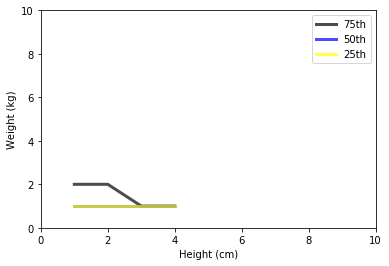

In [119]:
CustomColors = ["black","blue","yellow"]
percent = [75, 50, 25]
for i in range(len(percent)):
    jintendn_percentiles = [cdf.Percentile(percent[i]) for cdf in cdfs]
    label = '%dth' % percent[i]
    thinkplot.Plot(mean_timesmar, jintendn_percentiles, label=label,color=CustomColors[i])
    
thinkplot.Config(xlabel='Height (cm)',
                 ylabel='Weight (kg)',
                 axis=[0,10,0,10],
                 legend=True)

In [133]:
# Part 4
scipy.stats.pearsonr(timesmar,jintendn)

(-0.03652346652385939, 0.23171606728546632)

In [134]:
scipy.stats.spearmanr(timesmar,jintendn)

SpearmanrResult(correlation=-0.08337747790348256, pvalue=0.006256598683894432)

#### They are both negative and close to 0. This means their relationship is random or non-existent

In [135]:
# comment on variables:

#### They are not related to each other. From their skewness data we learn that they are both skewed to the right.  The p value we got from the pearson correlation means that they are not statistically significant.